In [59]:
import numpy as np
import scipy
from brainiak.reprsimil.brsa import GBRSA
import brainiak.utils.utils as utils
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)

In [8]:
# read FSL style event files
dir_design = '/home/tselab/studies/vr1_data/code/BIDS/brainiak/design/'
path_designs = [dir_design + 'e' + str(i+1) for i in range(8)]

In [50]:
# generate the design matrix
TR_per_run = 189
nruns = 6
scan_duration = TR_per_run * nruns
tr = 2
design = utils.gen_design(path_designs, scan_duration, tr)

In [51]:
design.shape

(1134, 8)

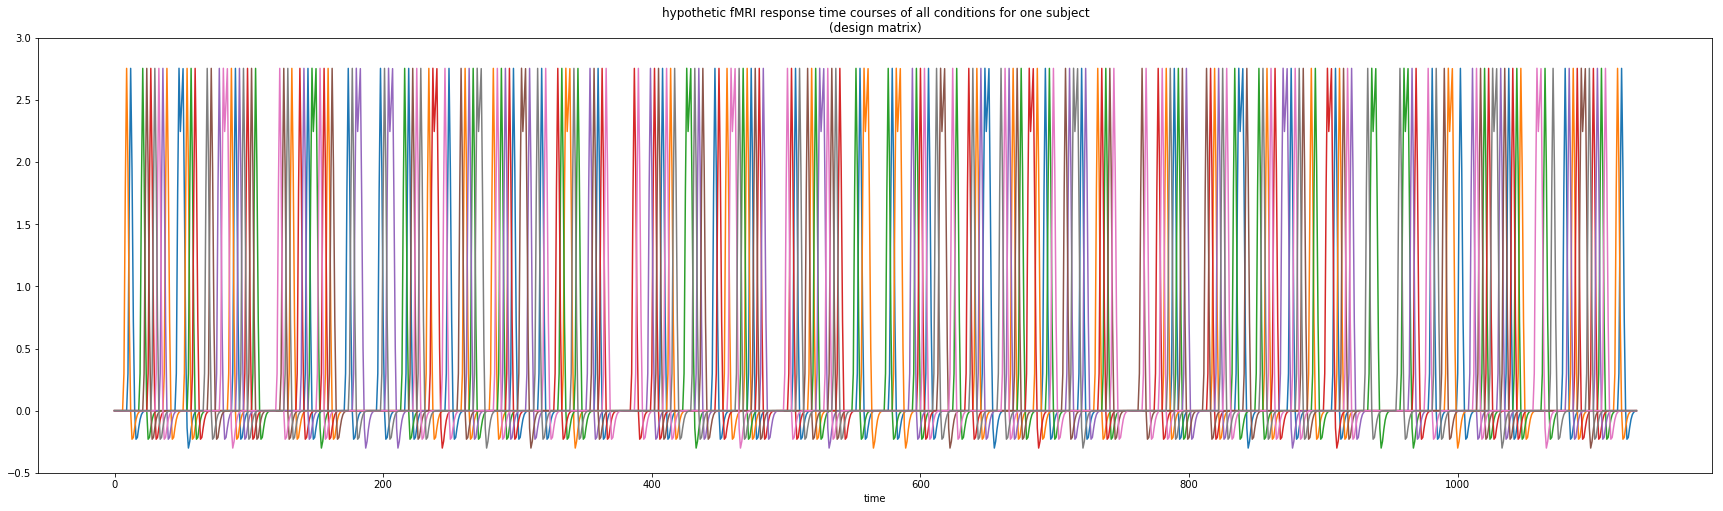

In [58]:
# visulization of design
fig = plt.figure(num=None, figsize=(30, 8),
                 facecolor='w', edgecolor='k')
plt.plot(design)
plt.ylim([-.5, 3])
plt.title('hypothetic fMRI response time courses '
          'of all conditions for one subject\n'
         '(design matrix)')
plt.xlabel('time')
plt.show()

In [92]:
# load fmri data with ROIs
# (it's tricky with pyMVPA..since I use Python 3... so I did data masking in matlab with CoSMoMVPA)
matdata = scipy.io.loadmat('roi_data.mat', squeeze_me = True)

In [110]:
# split to mask/session
ppa_s1 = list(matdata['data1'][0])
rsc_s1 = list(matdata['data1'][1])
opa_s1 = list(matdata['data1'][2])
hippo_s1 = list(matdata['data1'][3])
v1_s1 = list(matdata['data1'][4])

ppa_s2 = list(matdata['data2'][0])
rsc_s2 = list(matdata['data2'][1])
opa_s2 = list(matdata['data2'][2])
hippo_s2 = list(matdata['data2'][3])
v1_s2 = list(matdata['data2'][4])

In [127]:
# for all subjects (n = 21)
nsubjs = 21
designs = [design.copy() for _ in range(nsubjs)]
scan_onsets = [np.array(range(0, scan_duration, TR_per_run)) for _ in range(nsubjs)]

In [129]:
gbrsa = GBRSA()
# Initiate an instance

gbrsa.fit(X=v1_s1, design=designs, scan_onsets=scan_onsets)
# The data to fit should be given to the argument X.
# Design matrix goes to design. And so on.

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:3138: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = np.linalg.lstsq(ts_reg, X[s_id])[0]
Please be aware that you did not specify the rank of covariance matrix to estimate.I will assume that the covariance matrix shared among voxels is of full rank.Rank = 8
Please be aware that estimating a matrix of high rank can be very slow.If you have a good reason to specify a rank lower than the number of experiment conditions, do so.
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimens

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/nitime/utils.py:980: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.co

GBRSA(SNR_bins=21, SNR_prior='exp', anneal_speed=10, auto_nuisance=True,
   baseline_single=False, logS_range=1.0,
   minimize_options={'gtol': 0.0001, 'disp': False, 'maxiter': 20},
   n_iter=100, n_nureg=None,
   nureg_method=<function GBRSA.__init__.<locals>.<lambda> at 0x7f9dc4cf8d08>,
   nureg_zscore=True, optimizer='L-BFGS-B', random_state=None, rank=None,
   rho_bins=20, tol=0.0001)

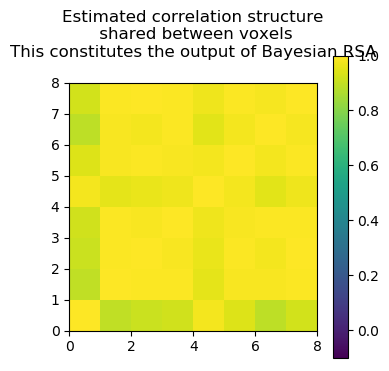

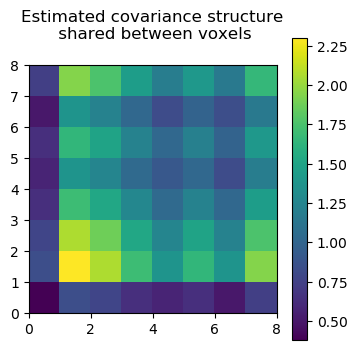

In [132]:
fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(gbrsa.C_, vmin=-0.1, vmax=1)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Estimated correlation structure\n shared between voxels\n'
         'This constitutes the output of Bayesian RSA\n')
plt.show()

fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(gbrsa.U_)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Estimated covariance structure\n shared between voxels\n')
plt.show()

In [ ]:
Y = v1_s1
n_C = 8
sum_point_corr = np.zeros((n_C, n_C))
sum_point_cov = np.zeros((n_C, n_C))
betas_point = [None] * n_subj
for subj in range(n_subj):
    regressor = np.insert(design[subj].design_task,
                          0, 1, axis=1)
    betas_point[subj] = np.linalg.lstsq(regressor, Y[subj])[0]
    point_corr = np.corrcoef(betas_point[subj][1:, :])
    point_cov = np.cov(betas_point[subj][1:, :])
    sum_point_corr += point_corr
    sum_point_cov += point_cov
    if subj == 0:
        fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
        plt.pcolor(point_corr, vmin=-0.1, vmax=1)
        plt.xlim([0, 16])
        plt.ylim([0, 16])
        plt.colorbar()
        ax = plt.gca()
        ax.set_aspect(1)
        plt.title('Correlation structure estimated\n'
                 'based on point estimates of betas\n'
                 'for subject {}'.format(subj))
        plt.show()

        fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
        plt.pcolor(point_cov)
        plt.xlim([0, 16])
        plt.ylim([0, 16])
        plt.colorbar()
        ax = plt.gca()
        ax.set_aspect(1)
        plt.title('Covariance structure of\n'
                 'point estimates of betas\n'
                 'for subject {}'.format(subj))
        plt.show()

fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(sum_point_corr / n_subj, vmin=-0.1, vmax=1)
plt.xlim([0, 16])
plt.ylim([0, 16])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Correlation structure estimated\n'
         'based on point estimates of betas\n'
         'averaged over subjects')
plt.show()

fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(sum_point_cov / n_subj)
plt.xlim([0, 16])
plt.ylim([0, 16])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Covariance structure of\n'
         'point estimates of betas\n'
         'averaged over subjects')
plt.show()

In [133]:
# try s2 v1
gbrsa2 = GBRSA()
# Initiate an instance

gbrsa2.fit(X=v1_s2, design=designs, scan_onsets=scan_onsets)
# The data to fit should be given to the argument X.
# Design matrix goes to design. And so on.

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:3138: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = np.linalg.lstsq(ts_reg, X[s_id])[0]
Please be aware that you did not specify the rank of covariance matrix to estimate.I will assume that the covariance matrix shared among voxels is of full rank.Rank = 8
Please be aware that estimating a matrix of high rank can be very slow.If you have a good reason to specify a rank lower than the number of experiment conditions, do so.
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimens

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/nitime/utils.py:980: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, np.complex) or
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/nitime/utils.py:981: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, np.complex))
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differe

GBRSA(SNR_bins=21, SNR_prior='exp', anneal_speed=10, auto_nuisance=True,
   baseline_single=False, logS_range=1.0,
   minimize_options={'gtol': 0.0001, 'disp': False, 'maxiter': 20},
   n_iter=100, n_nureg=None,
   nureg_method=<function GBRSA.__init__.<locals>.<lambda> at 0x7f9d955ab378>,
   nureg_zscore=True, optimizer='L-BFGS-B', random_state=None, rank=None,
   rho_bins=20, tol=0.0001)

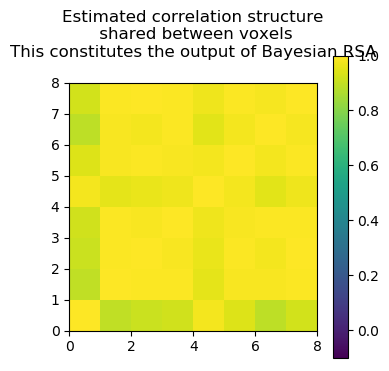

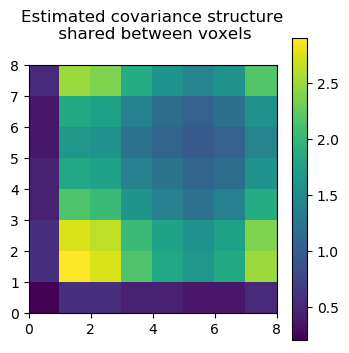

In [134]:
fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(gbrsa.C_, vmin=-0.1, vmax=1)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Estimated correlation structure\n shared between voxels\n'
         'This constitutes the output of Bayesian RSA\n')
plt.show()

fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(gbrsa2.U_)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Estimated covariance structure\n shared between voxels\n')
plt.show()

In [138]:
# add mapping of the space
matmapping = scipy.io.loadmat('remaps.mat', squeeze_me = True)

In [139]:
matmapping['subjs']

array(['sub-sid000013', 'sub-sid000021', 'sub-sid000027', 'sub-sid000035',
       'sub-sid000050', 'sub-sid000052', 'sub-sid000054', 'sub-sid000099',
       'sub-sid000102', 'sub-sid000114', 'sub-sid000290', 'sub-sid000341',
       'sub-sid000344', 'sub-sid000357', 'sub-sid000366', 'sub-sid000369',
       'sub-sid000406', 'sub-sid000415', 'sub-sid000416', 'sub-sid000535',
       'sub-sid000560'], dtype=object)

In [162]:
matmapping['maps']-1

array([array([1, 4, 6, 0, 5, 2, 3, 7], dtype=uint8),
       array([3, 0, 5, 1, 4, 7, 6, 2], dtype=uint8),
       array([0, 7, 3, 4, 1, 2, 6, 5], dtype=uint8),
       array([0, 4, 2, 7, 3, 5, 1, 6], dtype=uint8),
       array([5, 7, 0, 2, 4, 6, 1, 3], dtype=uint8),
       array([2, 3, 4, 5, 7, 6, 0, 1], dtype=uint8),
       array([0, 7, 1, 2, 3, 4, 5, 6], dtype=uint8),
       array([5, 0, 2, 4, 6, 3, 1, 7], dtype=uint8),
       array([7, 5, 3, 1, 2, 0, 4, 6], dtype=uint8),
       array([3, 0, 6, 2, 7, 4, 5, 1], dtype=uint8),
       array([3, 2, 5, 4, 6, 7, 1, 0], dtype=uint8),
       array([4, 0, 1, 6, 2, 7, 5, 3], dtype=uint8),
       array([0, 5, 6, 3, 7, 1, 2, 4], dtype=uint8),
       array([7, 5, 4, 6, 1, 3, 2, 0], dtype=uint8),
       array([0, 4, 6, 1, 7, 2, 5, 3], dtype=uint8),
       array([0, 3, 1, 5, 7, 4, 2, 6], dtype=uint8),
       array([5, 0, 3, 6, 7, 1, 4, 2], dtype=uint8),
       array([4, 1, 2, 5, 0, 6, 3, 7], dtype=uint8),
       array([0, 7, 6, 5, 1, 2, 4, 3], dtype=u

In [166]:
designs = [design.copy() for _ in range(nsubjs)]
for isubj in range(nsubjs):
    designs[isubj] = designs[isubj][:, matmapping['maps'][isubj]-1]

In [169]:
# try s2 hippo
gbrsa3 = GBRSA()
# Initiate an instance

gbrsa3.fit(X=hippo_s23, design=designs, scan_onsets=scan_onsets)
# The data to fit should be given to the argument X.
# Design matrix goes to design. And so on.

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:3138: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = np.linalg.lstsq(ts_reg, X[s_id])[0]
Please be aware that you did not specify the rank of covariance matrix to estimate.I will assume that the covariance matrix shared among voxels is of full rank.Rank = 8
Please be aware that estimating a matrix of high rank can be very slow.If you have a good reason to specify a rank lower than the number of experiment conditions, do so.
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimens

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

GBRSA(SNR_bins=21, SNR_prior='exp', anneal_speed=10, auto_nuisance=True,
   baseline_single=False, logS_range=1.0,
   minimize_options={'gtol': 0.0001, 'disp': False, 'maxiter': 20},
   n_iter=100, n_nureg=None,
   nureg_method=<function GBRSA.__init__.<locals>.<lambda> at 0x7f9d95350488>,
   nureg_zscore=True, optimizer='L-BFGS-B', random_state=None, rank=None,
   rho_bins=20, tol=0.0001)

In [173]:
gbrsa3.C_

array([[1.        , 0.99152864, 0.98954335, 0.96445857, 0.99966639,
        0.96988099, 0.98626783, 0.97806484],
       [0.99152864, 1.        , 0.99146869, 0.94094235, 0.98913652,
        0.98625436, 0.98723498, 0.98511081],
       [0.98954335, 0.99146869, 1.        , 0.96244615, 0.98830937,
        0.96909446, 0.99908756, 0.96684598],
       [0.96445857, 0.94094235, 0.96244615, 1.        , 0.96267455,
        0.87958743, 0.97001166, 0.88957143],
       [0.99966639, 0.98913652, 0.98830937, 0.96267455, 1.        ,
        0.96929332, 0.98454737, 0.97856446],
       [0.96988099, 0.98625436, 0.96909446, 0.87958743, 0.96929332,
        1.        , 0.95867455, 0.99664848],
       [0.98626783, 0.98723498, 0.99908756, 0.97001166, 0.98454737,
        0.95867455, 1.        , 0.95584267],
       [0.97806484, 0.98511081, 0.96684598, 0.88957143, 0.97856446,
        0.99664848, 0.95584267, 1.        ]])

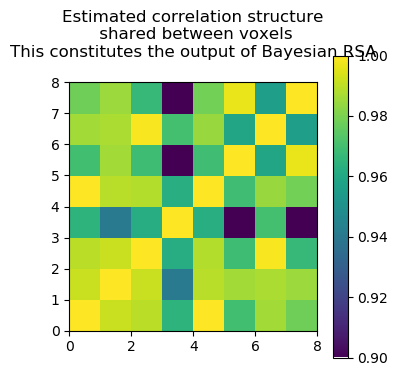

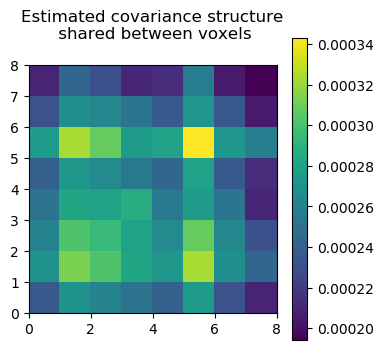

In [176]:
fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(gbrsa3.C_, vmin=0.9, vmax=1)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Estimated correlation structure\n shared between voxels\n'
         'This constitutes the output of Bayesian RSA\n')
plt.show()

fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(gbrsa3.U_)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Estimated covariance structure\n shared between voxels\n')
plt.show()

In [177]:
from brainiak.reprsimil.brsa import BRSA

In [178]:
designs = [design.copy() for _ in range(nsubjs)]

In [181]:
brsa = BRSA()
brsa.fit(X=v1_s2[0], design=designs[0], scan_onsets=scan_onsets[0])

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:730: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = np.linalg.lstsq(ts_reg, X)[0]
Please be aware that you did not specify the rank of covariance matrix to estimate.I will assume that the covariance matrix shared among voxels is of full rank.Rank = 8
Please be aware that estimating a matrix of high rank can be very slow.If you have a good reason to specify a rank lower than the number of experiment conditions, do so.
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1787: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1080: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg_sol = np.linalg.lstsq(X_DC, X_base)
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/brainiak/reprsimil/brsa.py:1051: FutureWarning: `rcond` parameter will change to the default of machine prec

/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/nitime/utils.py:980: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, np.complex) or
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/nitime/utils.py:981: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, np.complex))
/home/tselab/anaconda3/envs/venv/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differe

BRSA(GP_inten=False, GP_space=False, anneal_speed=10, auto_nuisance=True,
   baseline_single=False, eta=0.0001, init_iter=20,
   inten_smooth_range=None,
   minimize_options={'gtol': 0.0001, 'disp': False, 'maxiter': 6},
   n_iter=100, n_nureg=None,
   nureg_method=<function BRSA.__init__.<locals>.<lambda> at 0x7f9d955729d8>,
   nureg_zscore=True, optimizer='L-BFGS-B', random_state=None, rank=None,
   space_smooth_range=None,
   tau2_prior=<function prior_GP_var_inv_gamma at 0x7f9daf371620>,
   tau_range=5.0, tol=0.0001)

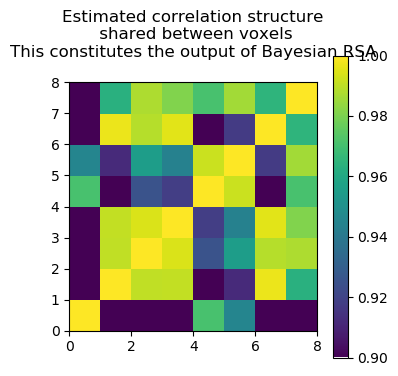

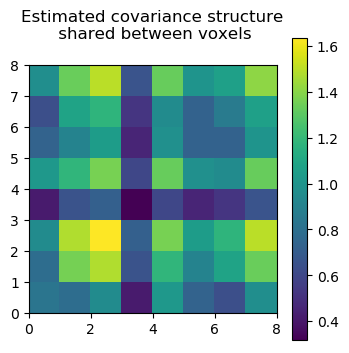

In [183]:
fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(brsa.C_, vmin=0.9, vmax=1)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Estimated correlation structure\n shared between voxels\n'
         'This constitutes the output of Bayesian RSA\n')
plt.show()

fig = plt.figure(num=None, figsize=(4, 4), dpi=100)
plt.pcolor(brsa.U_)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.colorbar()
ax = plt.gca()
ax.set_aspect(1)
plt.title('Estimated covariance structure\n shared between voxels\n')
plt.show()

In [180]:
help(BRSA.fit)

Help on function fit in module brainiak.reprsimil.brsa:

fit(self, X, design, nuisance=None, scan_onsets=None, coords=None, inten=None)
    Compute the Bayesian RSA
    
    Parameters
    ----------
    X: numpy array, shape=[time_points, voxels]
        If you have multiple scans of the same participants that you
        want to analyze together, you should concatenate them along
        the time dimension after proper preprocessing (e.g. spatial
        alignment), and specify the onsets of each scan in scan_onsets.
    design: numpy array, shape=[time_points, conditions]
        This is the design matrix. It should only include the hypothetic
        response for task conditions. You should not include
        regressors for a DC component or motion parameters, unless you
        want to estimate their pattern similarity with response patterns
        to your task conditions. If you want to model head motion,
        you should include them in nuisance regressors.
        If you ha